In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from ema_workbench import load_results, save_results
from ema_workbench.analysis import clusterer, plotting, Density

In [3]:
experiments, outcomes = load_results("../results/1k_run_0604.tar.gz")

### Data structure explanation

`experiments`: DF where each row is one experiment and the columns represent the uncertainties (input parameter)

`outcomes`: Dict where keys are measured outcomes and values are 2d arrays. Casted to a DF, each row in the 2d array contains a single run's outcome (as a timeseries). The columns indicate the time step. The row index matches that of `experiments`.

In [4]:
pd.DataFrame(outcomes['Household Population']).head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10560,10560,10954,10954,11016,11016,11272,11272,11272,11272
1,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,5530,5530,5724,5724,5756,5756,5894,5894,5894,5894
2,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,7611,7300,7300,7300,7300,7300,7300,7300,7300,7300
3,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,6987,6707,6707,6688,6688,6688,6688,6688,6688,6688
4,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,7158,7158,7405,7405,7441,7441,7614,7614,7614,7614


In [5]:
data = outcomes['Household Population']
data

array([[10000, 10000, 10000, ..., 11272, 11272, 11272],
       [10000, 10000, 10000, ...,  5894,  5894,  5894],
       [10000, 10000, 10000, ...,  7300,  7300,  7300],
       ...,
       [10000, 10000, 10000, ..., 12763, 12763, 12763],
       [10000, 10000, 10000, ...,  5294,  5294,  5294],
       [10000, 10000, 10000, ...,  9275,  9275,  9275]], dtype=int64)

Benchmarking: for a single outcome in an experiment with 10k runs, this next cell takes 7 minutes to run. _(I should build a way to automatically calculate and save this for each outcome, in DelftBlue)._

In [6]:
distances = clusterer.calculate_cid(data)
distances

array([[    0.        , 44783.90623211, 35344.45690215, ...,
        10861.56603976, 36478.53484697, 20792.03208946],
       [44783.90623211,     0.        ,  8677.25787199, ...,
        46081.19461296, 15519.86876075, 19866.32422092],
       [35344.45690215,  8677.25787199,     0.        , ...,
        34809.27935052, 19331.36324061, 11777.96486394],
       ...,
       [10861.56603976, 46081.19461296, 34809.27935052, ...,
            0.        , 40765.76787508, 20622.38529715],
       [36478.53484697, 15519.86876075, 19331.36324061, ...,
        40765.76787508,     0.        , 24313.18199623],
       [20792.03208946, 19866.32422092, 11777.96486394, ...,
        20622.38529715, 24313.18199623,     0.        ]])

`distances` is 1000x1000 (`len(experiments)^2`). Cell `i,j` is the distance between the time-series of this outcome from experiments `i,j` (as rows/indices in the `experiments` df). It is mirrored.

In [7]:
pd.DataFrame(distances).head(3)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.000000,44783.906232,35344.456902,37301.047000,35670.953333,41965.288109,37182.488192,6324.203478,7959.013597,39458.177552,...,6204.611832,18839.959703,40721.197853,39490.426370,20009.960771,44012.835332,31228.385480,10861.566040,36478.534847,20792.032089
1,44783.906232,0.000000,8677.257872,6817.223148,9705.440841,6252.477250,5574.587067,49046.623288,42355.839796,15088.468769,...,34685.948290,21723.296227,4375.910897,6738.294041,24060.352595,4462.746136,11637.757078,46081.194613,15519.868761,19866.324221
2,35344.456902,8677.257872,0.000000,2694.078209,2515.858518,7239.703480,3992.349506,38232.785890,33892.086052,19131.265995,...,26888.535835,14326.017567,5213.433333,3115.067422,14754.559854,5362.420753,3669.096774,34809.279351,19331.363241,11777.964864


Holy shit saving this would be 6gb? 10000 rows x 10000 columns == 100,000,000 items. 64 bytes each is 6.4GB??
(This one is only 1000x1000x64 == 64 MB, but ^that's for 10k)

I have to get a database set up. But that's gonna be $$$ for all my data. I need a hard drive lol.

In [8]:
# pd.DataFrame(distances).to_csv("../results/clustering_distances/10k_run_0605__household_population__distances.csv")

In [9]:
# clusterer.plot_dendrogram(distances)

In [10]:
clusters = clusterer.apply_agglomerative_clustering(distances, n_clusters=5)
clusters

array([4, 1, 1, 1, 1, 1, 1, 4, 4, 0, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 4, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 4, 4, 1, 1,
       1, 4, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 4, 0, 1, 1, 1, 4, 0, 4, 4, 1,
       0, 1, 1, 1, 1, 0, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       4, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 4, 1, 2, 4, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 4, 1, 0, 4, 1, 4, 1, 1, 4, 2, 4, 1, 1, 4, 1,
       0, 4, 1, 0, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 1, 4, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 4, 1, 1, 1, 1, 1, 1, 0, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 4, 4, 1,

In [11]:
clusters_df = pd.DataFrame(clusters)
clusters_df.columns = ['Household Population']
clusters_df.index.names = ['Experiment']

In [12]:
clusters_df

,Household Population
Experiment,
0,4
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,4


In [13]:
clusters_df['Household Population'].value_counts()

Household Population
1    731
4    183
0     72
2     13
3      1
Name: count, dtype: int64

Benchmarking: the plotting cell for a 10k run experiment takes 16 minutes to run, for 3 outcomes with 1 set of clusters.

In [14]:
from plotting import plot_lines

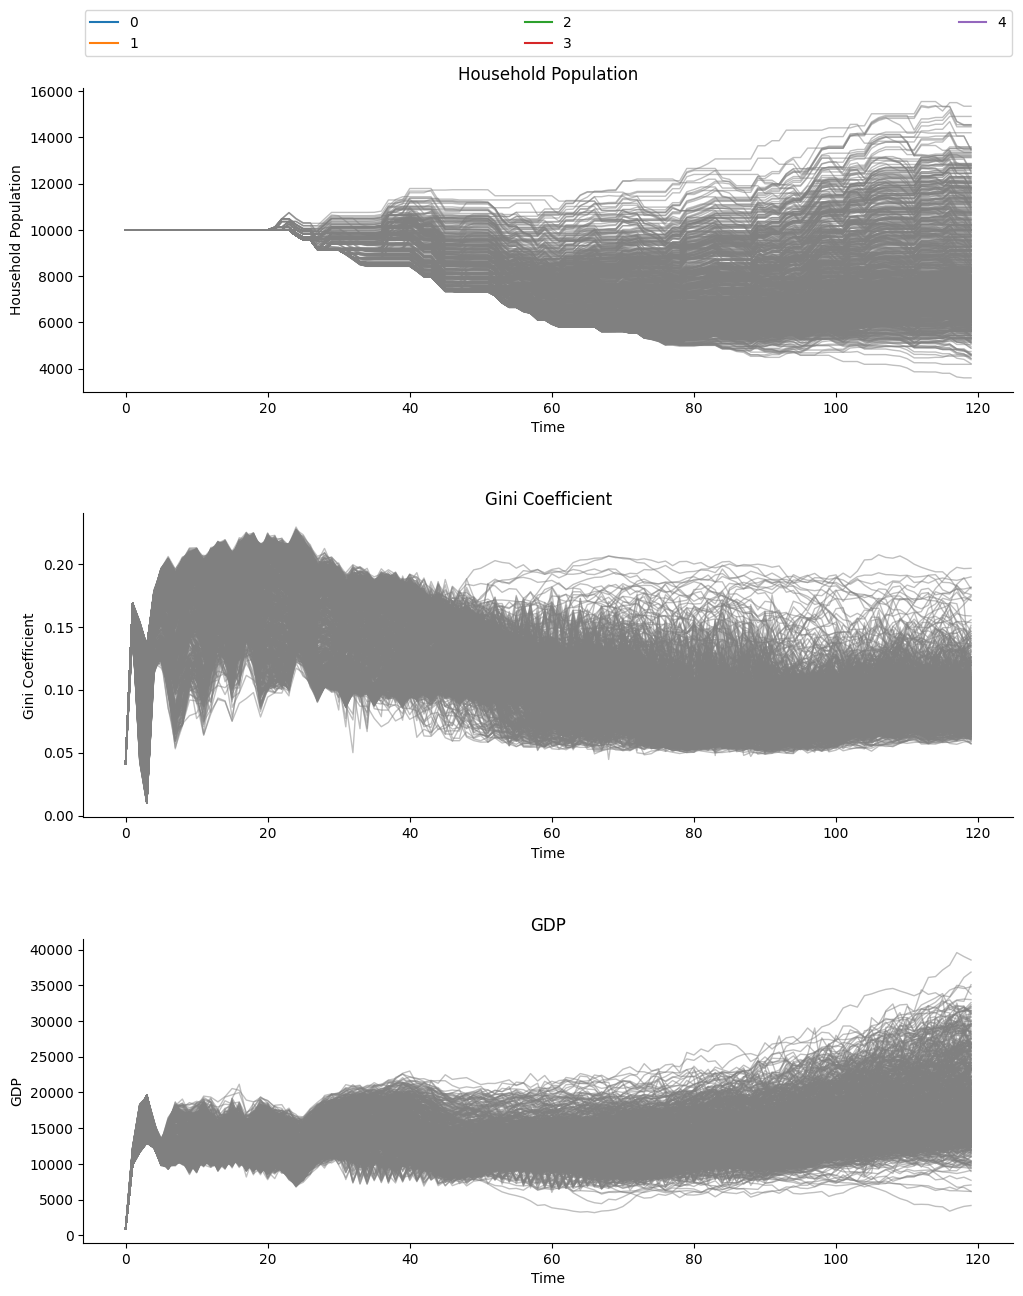

In [15]:
x = experiments.copy()
x["clusters"] = clusters.astype("object")
# plotting.lines(x, outcomes, group_by="clusters", density=Density.BOXPLOT)
# plt.show()
fig, axes = plot_lines(x, outcomes,
        n_steps=120,
        outcomes_to_show=['Household Population', 'Gini Coefficient', 'GDP'],
        group_by='clusters'
)